# Data Preparation

In [2]:
# Import dependancies
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Read crypto_data.csv
crypto = pd.read_csv("Resources/crypto_data.csv")
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Discard all cryptocurrencies that are not being traded
traded = crypto.loc[crypto['IsTrading']==True]

In [5]:
traded = traded.drop(labels='IsTrading', axis=1)
traded.shape

(1144, 6)

In [6]:
# Remove all rows that have at least one null value
traded = traded.dropna(how="any")

In [7]:
# Filter for cryptocurrencies that have been mined
mined_crypto = traded.loc[crypto['TotalCoinsMined']>0]
mined_crypto.shape

(532, 6)

In [8]:
# Delete the CoinName from the original dataframe.
crypto_new = mined_crypto.drop(labels='CoinName', axis=1)
crypto_new.columns

Index(['Unnamed: 0', 'Algorithm', 'ProofType', 'TotalCoinsMined',
       'TotalCoinSupply'],
      dtype='object')

In [9]:
# Drop unnamed 0 column
crypto_new = crypto_new.drop(labels='Unnamed: 0', axis=1)
crypto_new.shape

(532, 4)

In [10]:
# Check for text values
crypto_new.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [11]:
# Convert TotalCoinSupply to numeric
crypto_new.astype({'TotalCoinSupply': 'float'}).dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [12]:
# Convert 'Algorithm','ProofType' columns to numeric using get_dummies 
final_df = pd.get_dummies(crypto_new, prefix='', prefix_sep='',columns=['Algorithm','ProofType'])

In [13]:
final_df.shape

(532, 98)

# Scaling the data 

In [14]:
# Standardize your dataset 
scaler = StandardScaler()
scaled_crypto = scaler.fit_transform(final_df)
print(scaled_crypto.shape)

(532, 98)


# PCA

In [15]:
# Initialize PCA model with 0.90 preserve
pca = PCA(n_components=0.90)

pca_crypto = pca.fit_transform(scaled_crypto)

In [16]:
pc_vars = pca.explained_variance_
pca_crypto.shape

(532, 74)

# t-SNE model

/Users/jessica/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jessica/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jess

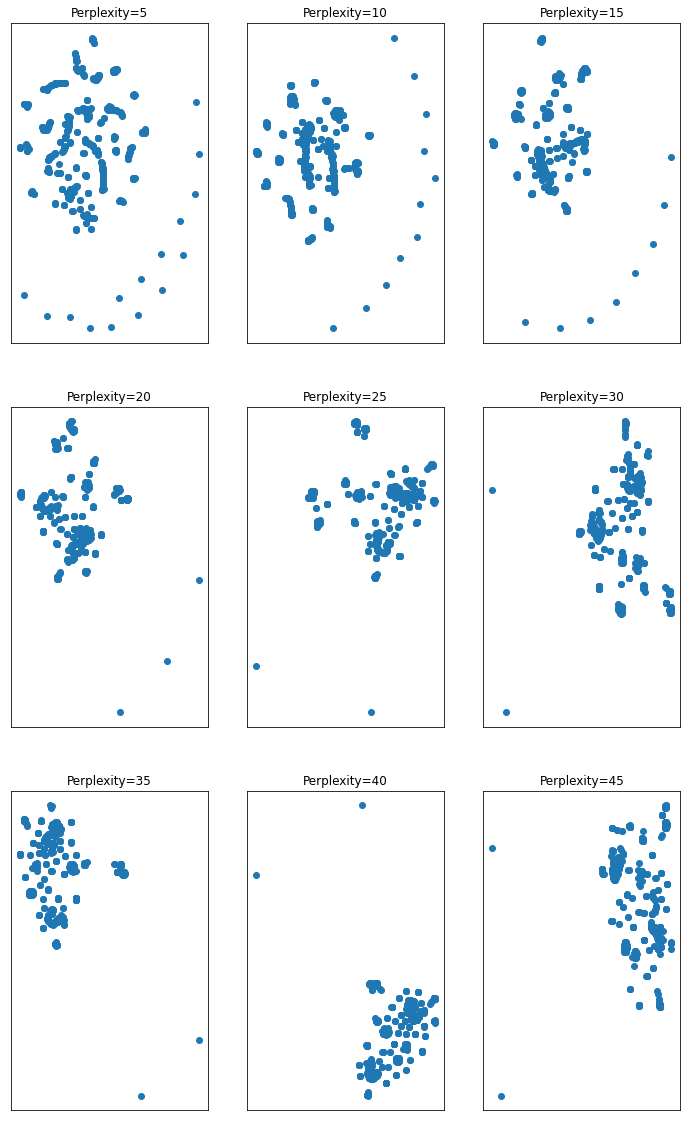

(532, 2)

In [17]:
# t-SNE for different perplexity values
fig, axs = plt.subplots(3,3, figsize=(12,20))
perplexity_list = [5,10,15,20,25,30,35,40,45]
axs = axs.ravel()
for i, p in enumerate(perplexity_list):
    tsne = TSNE(perplexity=p, n_components=2)
    tsne_modelled = tsne.fit_transform(pca_crypto)
    axs[i].scatter(tsne_modelled[:,0], tsne_modelled[:,1])
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    axs[i].set_title(f"Perplexity={p}")
plt.show()
tsne_modelled.shape

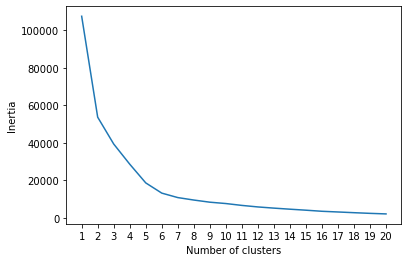

In [28]:
# Plot an elbow curve to find best k value using t-sne
inertia = []
k_list = list(range(1,21,1))
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(tsne_modelled)
    inertia.append(km.inertia_)
# Plot the curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

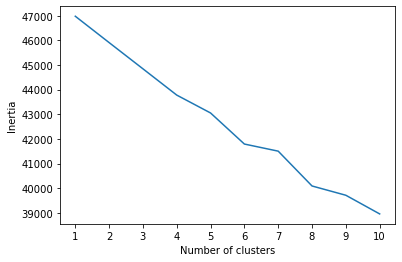

In [33]:
# Plot an elbow curve to find best k value using pca
inertia = []
k_list = [1,2,3,4,5,6,7,8,9,10]
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(pca_crypto)
    inertia.append(km.inertia_)
# Plot the curve
plt.plot(k_list, inertia)
plt.xticks(k_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Recommendation